## Your Stakeholder Wants More Data!


After investigating the preview of your data from Part 1, your stakeholder realized that there is no financial information included in the IMDB data (e.g. budget or revenue).

   - This will be a major roadblock when attempting to analyze which movies are successful and must be addressed before you will be able to determine which movies are successful.

   - Your stakeholder identified The Movie Database (TMDB) as a great source of financial data (https://www.themoviedb.org/). Thankfully, TMDB offers a free API for programmatic access to their data!

   - Your stakeholder wants you to extract the budget, revenue, and MPAA Rating (G/PG/PG-13/R), which is also called "Certification".

   - Note: this process can take a long time and may need to run overnight.

## Specification - Financial Data

Your stakeholder would like you to extract and save the results for movies that meet all of the criteria established in part 1 of the project (You should already have a filtered dataframe saved from part one as a csv.gz file)

   - As a proof-of-concept, they requested you perform a test extraction of movies that started in 2000 or 2001

   - Each year should be saved as a separate .csv.gz file

Hint: Use the two custom functions from the lessons (Intro to TMDB API, and Efficient TMDB API Calls). Be sure to define these functions prior to calling them in your code!

   - One function will add the certification (MPGG Rating) to movie.info
   - The other function will help you append/extend a JSON file with Python


### Confirm Your API Function works.

In order to ensure your function for extracting movie data from TMDB is working, test your function on these 2 movie ids: tt0848228 ("The Avengers") and tt0332280 ("The Notebook"). Make sure that your function runs without error and that it returns the correct movie's data for both test ids.

Hint: Ideally you can organize the code segments from the previous lesson to create an outer and inner loop, but if you get stuck, you can complete 1 year at a time.

 - Once you have retrieved and saved the final results to 2 separate .csv.gz files, move on to a new Exploratory Data Analysis notebook to explore the following questions.


## Exploratory Data Analysis

- Load in your csv.gz's of results for each year extracted.
    1. Concatenate the data into 1 dataframe for the remainder of the analysis.
- Once you have your data from the API, they would like you to perform some light EDA to show:
    1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
     - Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
    2. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
    3. What is the average revenue per certification category?
    4. What is the average budget per certification category?

## Deliverables

After you have joined the tmdb results into 1 dataframe in the EDA Notebook,

- Save a final merged .csv.gz of all of the tmdb api data
- The file name should be "tmdb_results_combined.csv.gz"
- Make sure this is pushed to your github repository along with all of your code
    - One code file for API calls
    - One code file for EDA
- Submit the link

---

## Using the TMDB API

In [7]:
!pip install tmdbsimple

In [8]:
import json
with open('/Users/valma/.secret/tmdb_api.json', 'r') as f:
    login = json.load(f)

login.keys()

dict_keys(['client-id', 'api-key'])

In [9]:
import tmdbsimple as tmdb
tmdb.API_KEY =  login['api-key']

In [10]:
movie = tmdb.Movies(603)
movie

In [11]:
info = movie.info()
info

{'adult': False,
 'backdrop_path': '/oMsxZEvz9a708d49b6UdZK1KAo5.jpg',
 'belongs_to_collection': {'id': 2344,
  'name': 'The Matrix Collection',
  'poster_path': '/bV9qTVHTVf0gkW0j7p7M0ILD4pG.jpg',
  'backdrop_path': '/bRm2DEgUiYciDw3myHuYFInD7la.jpg'},
 'budget': 63000000,
 'genres': [{'id': 28, 'name': 'Action'},
  {'id': 878, 'name': 'Science Fiction'}],
 'homepage': 'http://www.warnerbros.com/matrix',
 'id': 603,
 'imdb_id': 'tt0133093',
 'original_language': 'en',
 'original_title': 'The Matrix',
 'overview': 'Set in the 22nd century, The Matrix tells the story of a computer hacker who joins a group of underground insurgents fighting the vast and powerful computers who now rule the earth.',
 'popularity': 97.006,
 'poster_path': '/f89U3ADr1oiB1s9GkdPOEpXUk5H.jpg',
 'production_companies': [{'id': 79,
   'logo_path': '/tpFpsqbleCzEE2p5EgvUq6ozfCA.png',
   'name': 'Village Roadshow Pictures',
   'origin_country': 'US'},
  {'id': 372,
   'logo_path': None,
   'name': 'Groucho II Film

In [12]:
info['budget']

63000000

In [13]:
info['revenue']

463517383

In [14]:
info['imdb_id']

'tt0133093'

In [15]:
movie = tmdb.Movies('tt1361336')
info = movie.info()
info['budget']

50000000

In [16]:
response = movie.releases()

In [17]:
response

{'id': 587807,
 'countries': [{'certification': '',
   'descriptors': [],
   'iso_3166_1': 'CO',
   'primary': False,
   'release_date': '2021-02-12'},
  {'certification': 'PG',
   'descriptors': [],
   'iso_3166_1': 'US',
   'primary': False,
   'release_date': '2021-02-26'},
  {'certification': 'ALL',
   'descriptors': [],
   'iso_3166_1': 'KR',
   'primary': False,
   'release_date': '2021-02-24'},
  {'certification': '',
   'descriptors': [],
   'iso_3166_1': 'ID',
   'primary': False,
   'release_date': '2021-03-10'},
  {'certification': '6',
   'descriptors': [],
   'iso_3166_1': 'NL',
   'primary': False,
   'release_date': '2021-06-09'},
  {'certification': 'G',
   'descriptors': [],
   'iso_3166_1': 'IE',
   'primary': False,
   'release_date': '2021-05-07'},
  {'certification': 'M/6',
   'descriptors': [],
   'iso_3166_1': 'PT',
   'primary': False,
   'release_date': '2021-03-04'},
  {'certification': '6+',
   'descriptors': [],
   'iso_3166_1': 'RU',
   'primary': False,
  

In [18]:
response = movie.releases()
for c in movie.countries:
    if c['iso_3166_1'] == 'US':
        print(c['certification'])

PG
PG
PG


In [19]:
movie = tmdb.Movies('tt1361336')
info = movie.info()
releases = movie.releases()
    
for c in releases['countries']:
    if c ['iso_3166_1'] == 'US':
        info['certification'] = c['certification']
     

In [20]:
def get_movie_with_rating(movie_id):
    movie = tmdb.Movies('tt1361336')
    movie_info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1'] == 'US':
            info['certification'] = c['certification']
            
    return movie_info

In [21]:
id = 'tt0848228'

In [22]:
get_movie_with_rating(id)

{'adult': False,
 'backdrop_path': '/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg',
 'belongs_to_collection': None,
 'budget': 50000000,
 'genres': [{'id': 35, 'name': 'Comedy'},
  {'id': 10751, 'name': 'Family'},
  {'id': 16, 'name': 'Animation'}],
 'homepage': 'https://www.tomandjerrymovie.com',
 'id': 587807,
 'imdb_id': 'tt1361336',
 'original_language': 'en',
 'original_title': 'Tom & Jerry',
 'overview': 'Tom the cat and Jerry the mouse get kicked out of their home and relocate to a fancy New York hotel, where a scrappy employee named Kayla will lose her job if she can’t evict Jerry before a high-class wedding at the hotel. Her solution? Hiring Tom to get rid of the pesky mouse.',
 'popularity': 46.466,
 'poster_path': '/8XZI9QZ7Pm3fVkigWJPbrXCMzjq.jpg',
 'production_companies': [{'id': 25120,
   'logo_path': '/lMj6nMJBOzfLEd2fu8uF530AJcv.png',
   'name': 'Warner Bros. Pictures Animation',
   'origin_country': 'US'},
  {'id': 8922,
   'logo_path': '/yZWehAyjfKi4KvKeg1bkJ1bm5H8.png',
   'name'

## Efficient TMDB API Calls

In [23]:
from tqdm.notebook import tqdm_notebook

In [24]:
import os, time,json
import tmdbsimple as tmdb 
import pandas as pd
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['filtered_basic_years_filtered.csv.gz',
 'filtered_ratings.csv.gz',
 'filtered_re_akas_cleaned.csv.gz',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json']

In [25]:
def write_json(new_data, filename): 
    """Appends a list of records (new_data) to a json file (filename). 
    Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""  
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [26]:
df_basics = pd.read_csv(r'\Users\valma\OneDrive\Documents\GitHub\Project-3-Part-1\Data\filtered_basic_years_filtered.csv.gz')
df_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [27]:
years_to_get = [2000,2001]


In [28]:
import pandas as pd 
basics = pd.read_csv(r'\Users\valma\OneDrive\Documents\GitHub\Project-3-Part-1\Data\filtered_basic_years_filtered.csv.gz')
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
3,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"
4,tt0096056,movie,Crime and Punishment,Crime and Punishment,0,2002.0,NaN,126,Drama


In [29]:
def write_json(new_data, filename): 
    """Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/"""    
    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

In [30]:
for YEAR in tqdm_notebook(years_to_get, desc='YEARS', position=0):
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    file_exists = os.path.isfile(JSON_FILE)

    if file_exists == False:
        with open(JSON_FILE,'w') as f:
            json.dump([{'imdb_id':0}],f)

    df = basics.loc[basics['startYear']==YEAR].copy()

    movie_ids = df['tconst'].copy()
    movie_ids

    previous_df = pd.read_json(JSON_FILE)

    previous_df

    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    for movie_id in tqdm_notebook(movie_ids_to_get,
                                  desc=f'Movies from {YEAR}',
                                  position=1,
                                  leave=True):
        try:
            # Retrieve then data for the movie id
            temp = get_movie_with_rating(movie_id)  
            # Append/extend results to existing file using a pre-made function
            write_json(temp,JSON_FILE)
            # Short 20 ms sleep to prevent overwhelming server
            time.sleep(0.02)
            
        except Exception as e:
            continue

    final_year_df = pd.read_json(JSON_FILE)
    final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

Movies from 2000:   0%|          | 0/520 [00:00<?, ?it/s]

Movies from 2001:   0%|          | 0/2875 [00:00<?, ?it/s]

## Exploratory Data Analysis

Load in your csv.gz's of results for each year extracted.
  1. Concatenate the data into 1 dataframe for the remainder of the analysis.


Once you have your data from the API, they would like you to perform some light EDA to show:
   1. How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
   2. Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.
   3. How many movies are there in each of the certification categories (G/PG/PG-13/R)?
   4. What is the average revenue per certification category?
   5. What is the average budget per certification category?

In [31]:
df_final_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_final_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.0,3.0,NaN


In [33]:
df_final_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6208 entries, 0 to 6207
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                6208 non-null   object 
 1   adult                  6207 non-null   float64
 2   backdrop_path          3453 non-null   object 
 3   belongs_to_collection  244 non-null    object 
 4   budget                 6207 non-null   float64
 5   genres                 6207 non-null   object 
 6   homepage               2139 non-null   object 
 7   id                     6207 non-null   float64
 8   original_language      6207 non-null   object 
 9   original_title         6207 non-null   object 
 10  overview               5676 non-null   object 
 11  popularity             6207 non-null   float64
 12  poster_path            5309 non-null   object 
 13  production_companies   6207 non-null   object 
 14  production_countries   6207 non-null   object 
 15  rele

In [32]:
df_final_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df_final_2001

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
2,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
3,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
4,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
6026,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
6027,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0
6028,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,2021-02-10,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0


In [35]:
df_final_2001.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                6030 non-null   object 
 1   adult                  6029 non-null   float64
 2   backdrop_path          6029 non-null   object 
 3   belongs_to_collection  0 non-null      float64
 4   budget                 6029 non-null   float64
 5   genres                 6029 non-null   object 
 6   homepage               6029 non-null   object 
 7   id                     6029 non-null   float64
 8   original_language      6029 non-null   object 
 9   original_title         6029 non-null   object 
 10  overview               6029 non-null   object 
 11  popularity             6029 non-null   float64
 12  poster_path            6029 non-null   object 
 13  production_companies   6029 non-null   object 
 14  production_countries   6029 non-null   object 
 15  rele

In [41]:
df_final_merged = pd.concat([df_final_2000,df_final_2001],ignore_index = True, sort = False)
df_final_merged

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,7.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,NaN
12234,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,NaN
12235,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,NaN
12236,tt1361336,0.0,/9ns9463dwOeo1CK1JU2wirL5Yi1.jpg,NaN,50000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10751, '...",https://www.tomandjerrymovie.com,587807.0,en,Tom & Jerry,...,136536687.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Best of enemies. Worst of friends.,Tom & Jerry,0.0,6.9,2243.0,NaN


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_final_merged.

<AxesSubplot: xlabel='revenue', ylabel='budget'>

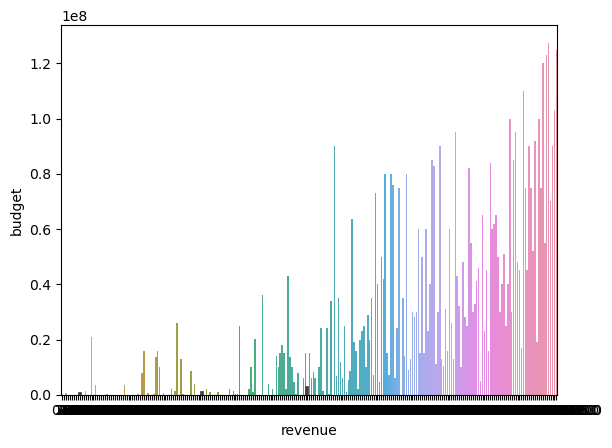

In [47]:
sns.barplot(df_final_merged, x='revenue', y = 'budget')